In [4]:

# Greg Maurer - August 2015

library(ggplot2)
library(plyr)
library(reshape2)

theme_set(theme_bw())

setwd('~/current/NMEG_seasonality/')

proc_path <- 'processed_data/'

source('~/current/NMEG_utils/r_functions/printfigs.r')
source('~/current/NMEG_utils/r_functions/get_daily_data.r')

# Drop everything from water year 2015
FC_daily = subset( FC_daily, year_w < 2015)
GPP_daily = subset( GPP_daily, year_w < 2015)
RE_daily = subset( RE_daily, year_w < 2015)
ET_daily = subset( ET_daily, year_w < 2015)
P_gauge_daily = subset( P_gauge_daily, year_w < 2015)
P_PRISM_daily = subset( P_PRISM_daily, year_w < 2015)

## Cumulative NEE by year

* Showing as bars and lines

   variable year_w  season         pct
1       Vcm   2008    Cold -0.08922354
2       Vcm   2008  Spring  0.31639902
3       Vcm   2008 Monsoon  0.77282452
4       Vcm   2009    Cold -0.05784255
5       Vcm   2009  Spring  0.48688828
6       Vcm   2009 Monsoon  0.57095427
7       Vcm   2010    Cold -0.10747752
8       Vcm   2010  Spring  0.22815522
9       Vcm   2010 Monsoon  0.87932230
10      Vcm   2011    Cold -0.30046401


ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead


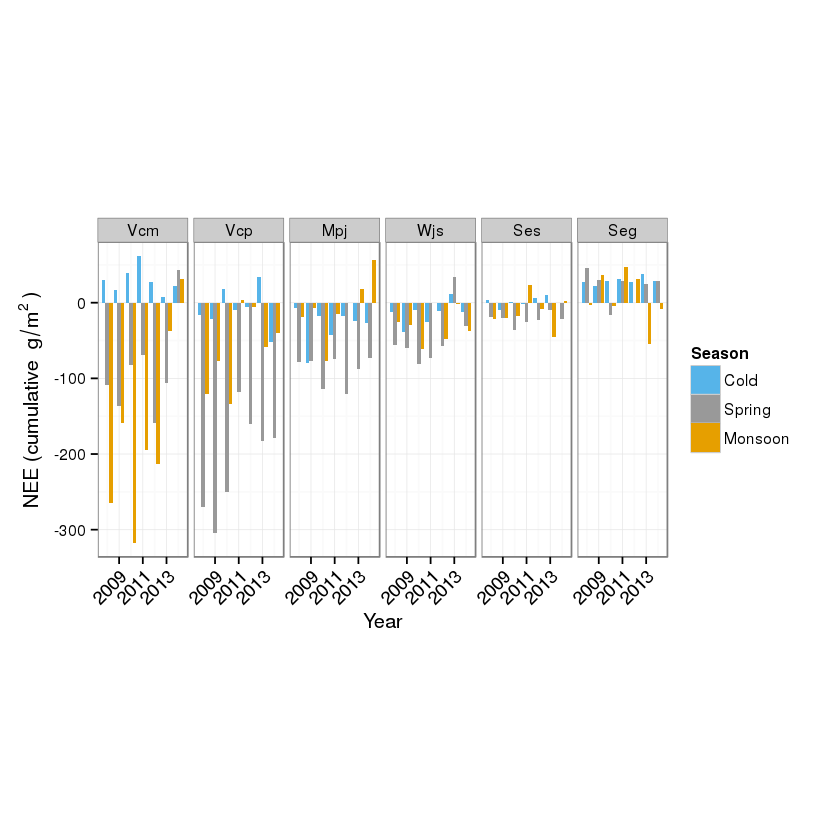

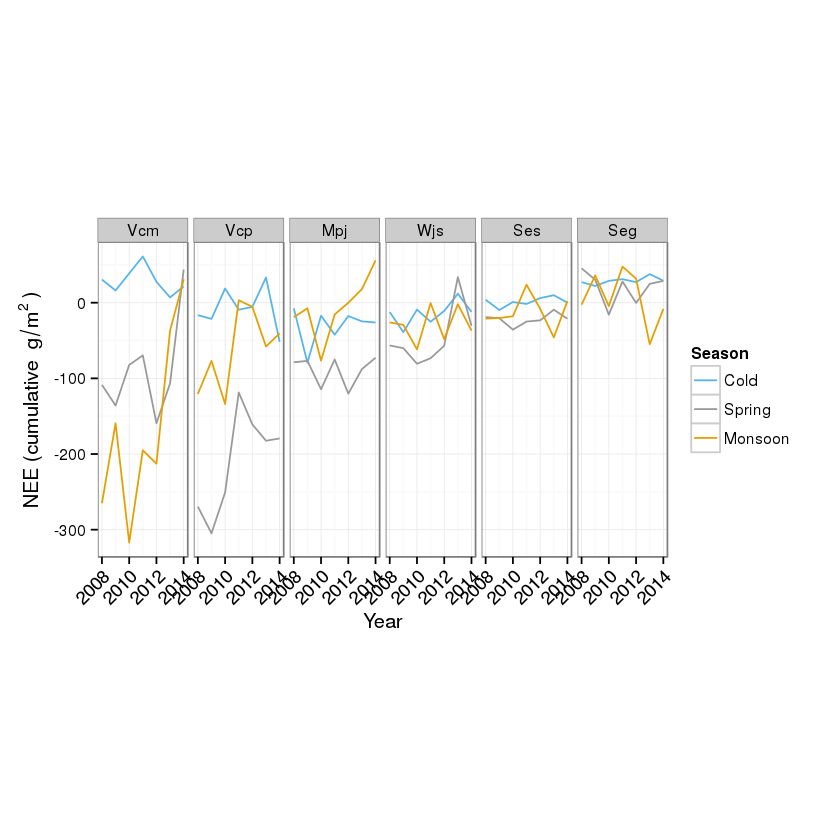

In [5]:
# Look at cumulative NEE over, divided into the 3 seasons
FC.m <- melt(FC_daily, id.vars=c('season', 'year_w'))
FC.m <- ddply(FC.m, .(variable, season, year_w), summarise, seas_sum = sum(value, na.rm = T))
#print(FC.m)
# Calculate seasonal NEE as a percentage for the year
FC.pct <- ddply(FC.m, .(variable, year_w), summarise, season=season, pct = seas_sum/sum(seas_sum, na.rm = T))
print(FC.pct[1:10,])

NEE_seas_by_yr <- ggplot(FC.m, aes(x=year_w, y=seas_sum, fill=factor(season))) +
    geom_bar(stat='identity', position='dodge') + facet_wrap(~variable, nrow=1) + 
    xlab('Year') + ylab(bquote('NEE (cumulative '~ g/m^2 ~')')) +
    theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
    scale_fill_manual(values=c("#56B4E9", "#999999", "#E69F00"), name="Season") +
    theme(aspect.ratio=3.5)

NEE_seas_by_yr

NEE_seas_by_yr2 <- ggplot(FC.m, aes(x=year_w, y=seas_sum, color=factor(season))) +
    geom_line(stat='identity', position='dodge') + facet_wrap(~variable, nrow=1) + 
    xlab('Year') + ylab(bquote('NEE (cumulative '~ g/m^2 ~')')) +
    theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
    scale_color_manual(values=c("#56B4E9", "#999999", "#E69F00"), name="Season") +
    theme(aspect.ratio=3.5)

NEE_seas_by_yr2

## Cumulative GPP by year

* Showing as bars and lines

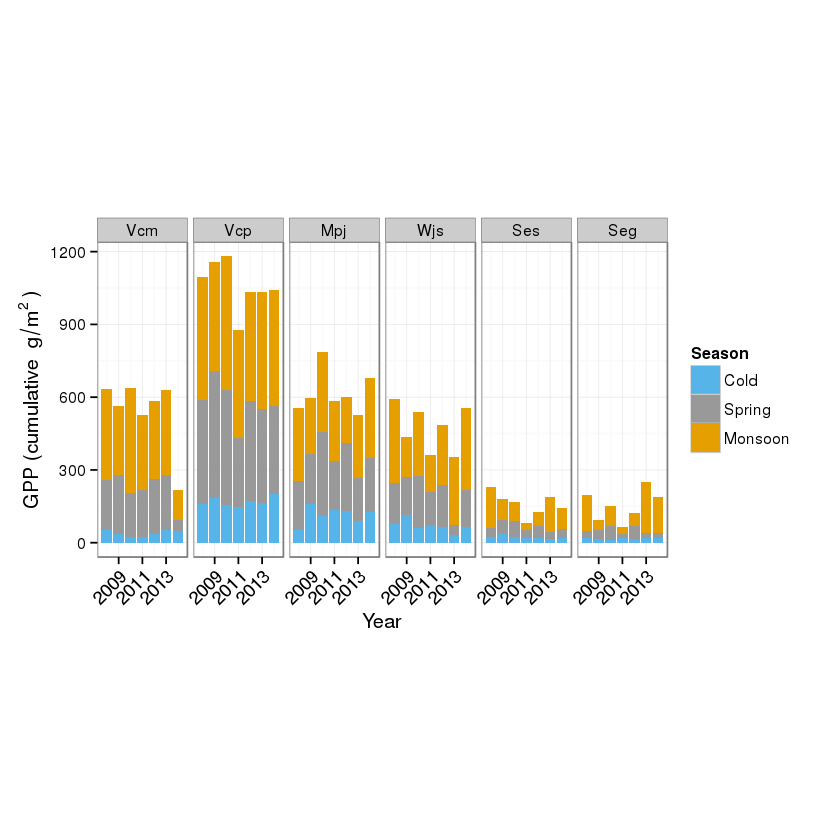

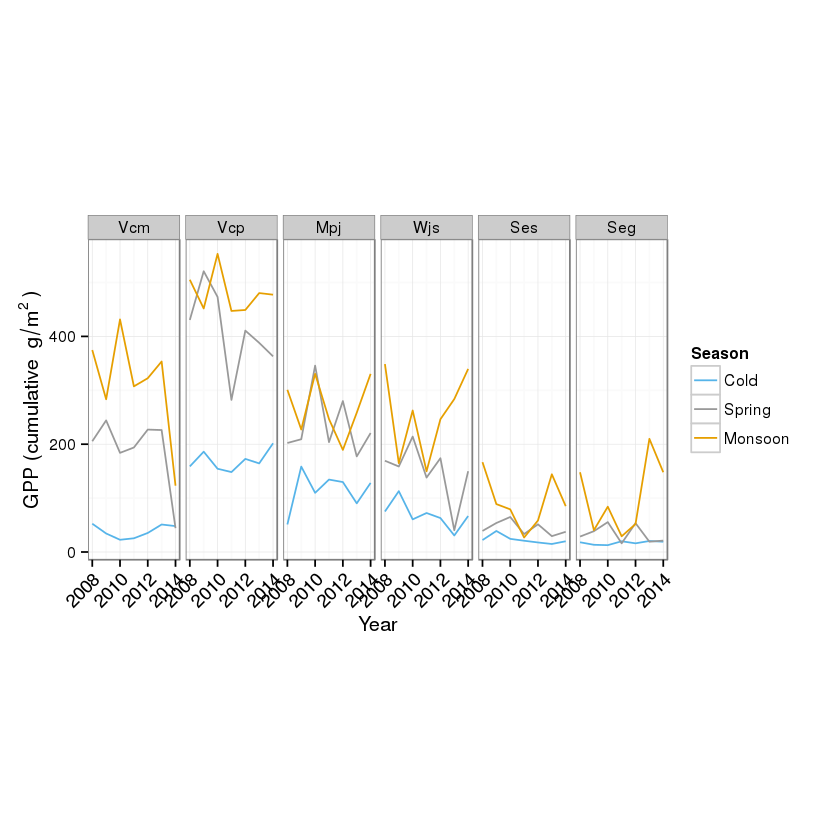

In [6]:
# Same for GPP
GPP.m <- melt(GPP_daily, id.vars=c('season', 'year_w'))
GPP.m <- ddply(GPP.m, .(variable, season, year_w), summarise, seas_sum = sum(value, na.rm = T))

GPP_seas_by_year <- ggplot(GPP.m, aes(x=year_w, y=seas_sum, fill=factor(season))) +
    geom_bar(stat='identity') + facet_wrap(~variable, nrow=1) + 
    xlab('Year') + ylab(bquote('GPP (cumulative '~ g/m^2 ~')')) +
    theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
    scale_fill_manual(values=c("#56B4E9", "#999999", "#E69F00"), name="Season") +
    theme(aspect.ratio=3.5)

GPP_seas_by_year

GPP_seas_by_year2 <- ggplot(GPP.m, aes(x=year_w, y=seas_sum, color=factor(season))) +
    geom_line(stat='identity') + facet_wrap(~variable, nrow=1) + 
    xlab('Year') + ylab(bquote('GPP (cumulative '~ g/m^2 ~')')) +
    theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
    scale_color_manual(values=c("#56B4E9", "#999999", "#E69F00"), name="Season") +
    theme(aspect.ratio=3.5)

GPP_seas_by_year2

## Cumulative GPP as percent of total by year

   variable year_w  season        pct
1       Vcm   2008    Cold 0.08298697
2       Vcm   2008  Spring 0.32472877
3       Vcm   2008 Monsoon 0.59228426
4       Vcm   2009    Cold 0.06110006
5       Vcm   2009  Spring 0.43456362
6       Vcm   2009 Monsoon 0.50433632
7       Vcm   2010    Cold 0.03554009
8       Vcm   2010  Spring 0.28827589
9       Vcm   2010 Monsoon 0.67618402
10      Vcm   2011    Cold 0.04830824


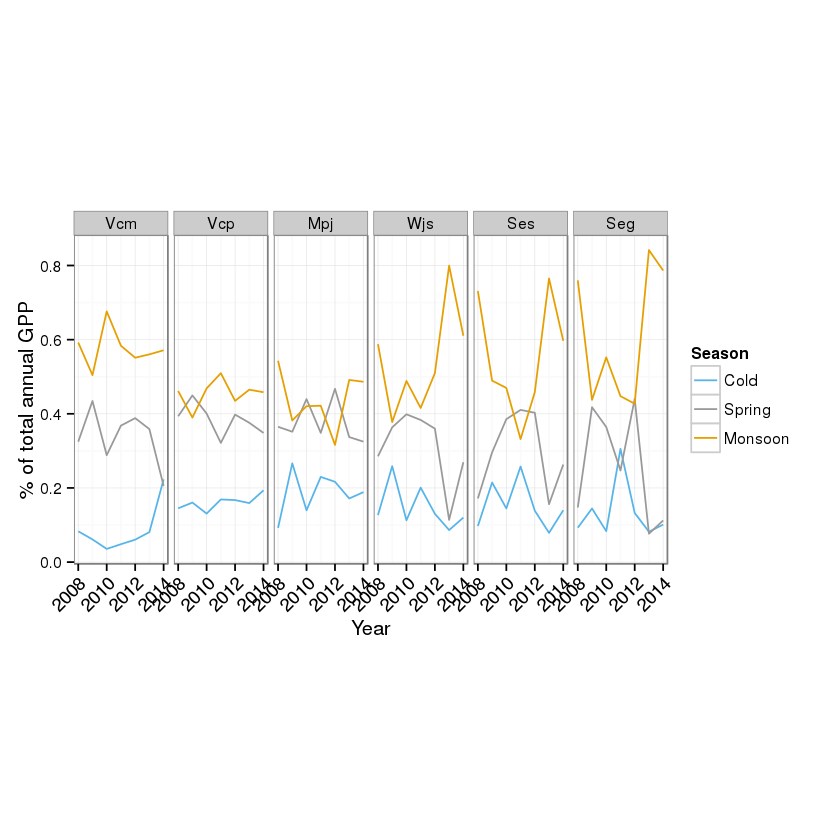

In [9]:
# Calculate seasonal GPP as a percentage for the year
GPP.pct <- ddply(GPP.m, .(variable, year_w), summarise, season=season, pct = seas_sum/sum(seas_sum, na.rm = T))
print(GPP.pct[1:10,])

GPP_seas_pct_year <- ggplot(GPP.pct, aes(x=year_w, y=pct, color=factor(season))) +
    geom_line(stat='identity') + facet_wrap(~variable, nrow=1) + 
    xlab('Year') + ylab('% of total annual GPP' ) +
    theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
    scale_color_manual(values=c("#56B4E9", "#999999", "#E69F00"), name="Season") +
    theme(aspect.ratio=3.5)

GPP_seas_pct_year

## Cumulative Reco by year

* Showing as bars and lines

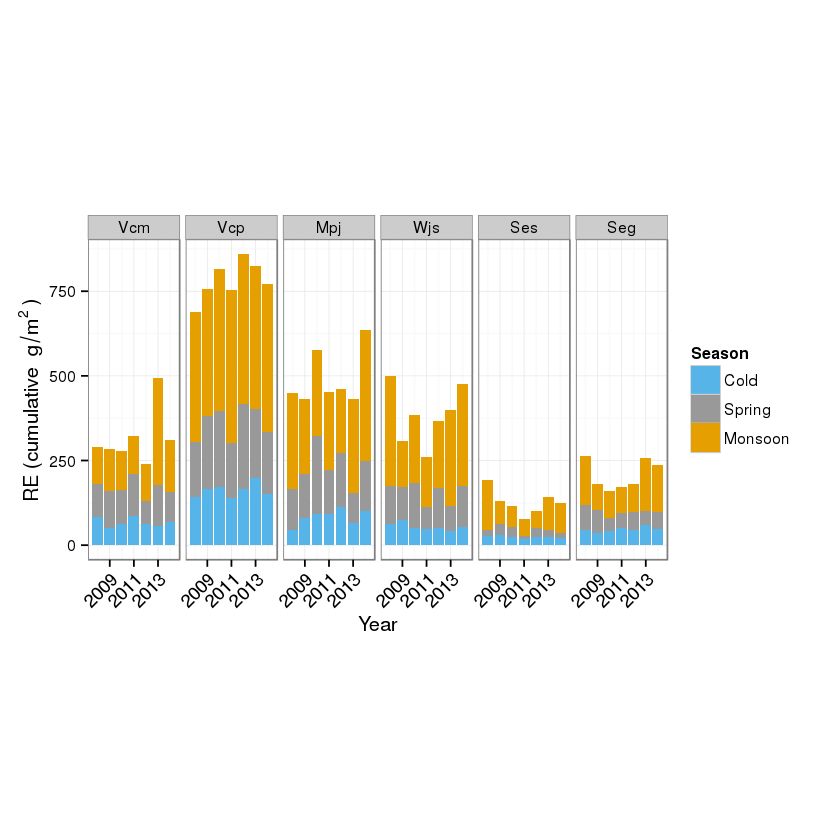

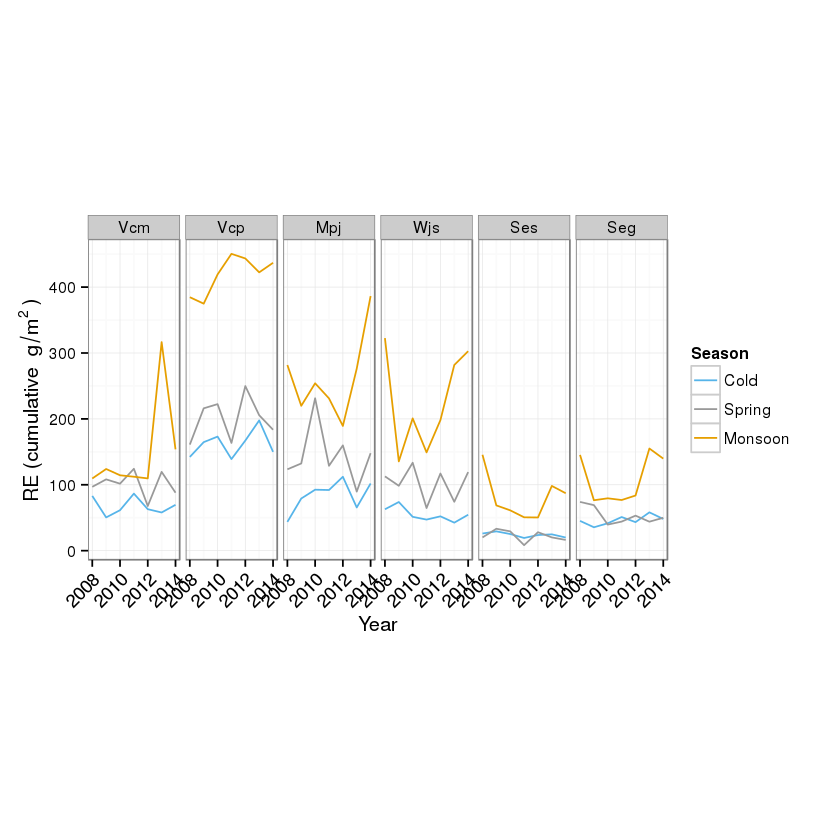

In [12]:
RE.m <- melt(RE_daily, id.vars=c('season', 'year_w'))
RE.m <- ddply(RE.m, .(variable, season, year_w), summarise, seas_sum = sum(value, na.rm = T))

RE_seas_by_yr <- ggplot(RE.m, aes(x=year_w, y=seas_sum, fill=factor(season))) +
  geom_bar(stat='identity') + facet_wrap(~variable, nrow=1) + 
  xlab('Year') + ylab(bquote('RE (cumulative '~ g/m^2 ~')')) +
  theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
  scale_fill_manual(values=c("#56B4E9", "#999999", "#E69F00"), name="Season") +
    theme(aspect.ratio=3.5)

RE_seas_by_yr


RE_seas_by_yr2 <- ggplot(RE.m, aes(x=year_w, y=seas_sum, color=factor(season))) +
  geom_line(stat='identity') + facet_wrap(~variable, nrow=1) + 
  xlab('Year') + ylab(bquote('RE (cumulative '~ g/m^2 ~')')) +
  theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
  scale_color_manual(values=c("#56B4E9", "#999999", "#E69F00"), name="Season") +
    theme(aspect.ratio=3.5)

RE_seas_by_yr2

## Cumulative Reco as percent of total by year

   variable year_w  season       pct
1       Vcm   2008    Cold 0.2870528
2       Vcm   2008  Spring 0.3345993
3       Vcm   2008 Monsoon 0.3783479
4       Vcm   2009    Cold 0.1785864
5       Vcm   2009  Spring 0.3828796
6       Vcm   2009 Monsoon 0.4385340
7       Vcm   2010    Cold 0.2213475
8       Vcm   2010  Spring 0.3663842
9       Vcm   2010 Monsoon 0.4122683
10      Vcm   2011    Cold 0.2680013


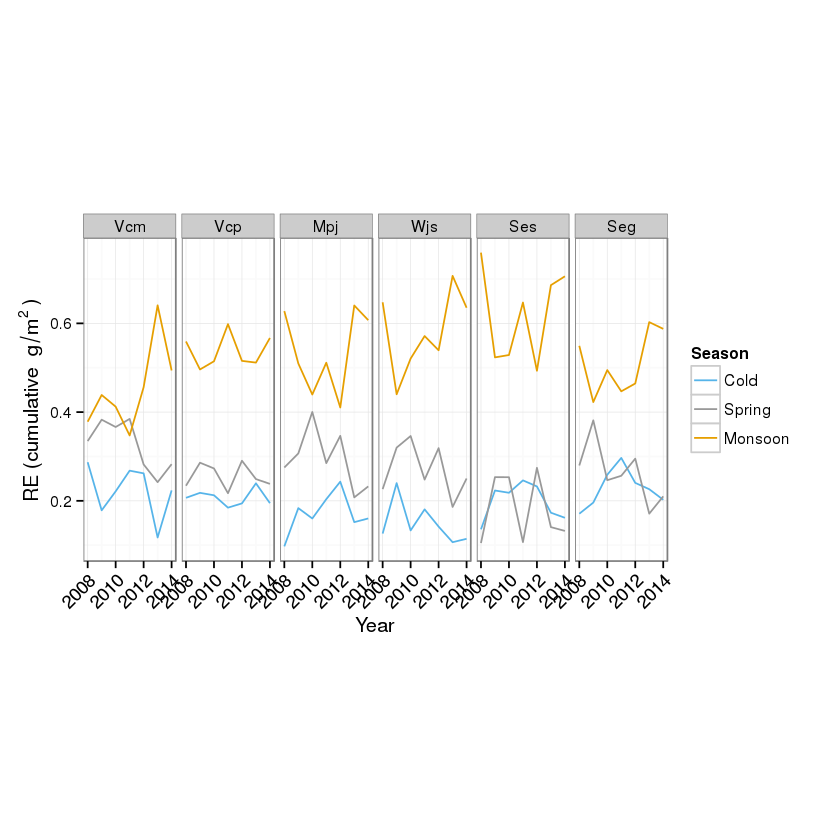

In [13]:
# Calculate seasonal RE as a percentage for the year
RE.pct <- ddply(RE.m, .(variable, year_w), summarise, season=season, pct = seas_sum/sum(seas_sum, na.rm = T))
print(RE.pct[1:10,])

RE_seas_pct_year <- ggplot(RE.pct, aes(x=year_w, y=pct, color=factor(season))) +
    geom_line(stat='identity') + 
facet_wrap(~variable, nrow=1) + 
    xlab('Year') + ylab(bquote('RE (cumulative '~ g/m^2 ~')')) +
    theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
    scale_color_manual(values=c("#56B4E9", "#999999", "#E69F00"), name="Season") +
    theme(aspect.ratio=3.5)

RE_seas_pct_year

## Cumulative ET by year (total and percent)

   variable year_w  season       pct
1       Vcm   2008    Cold 0.1630656
2       Vcm   2008  Spring 0.3525750
3       Vcm   2008 Monsoon 0.4843594
4       Vcm   2009    Cold 0.1313368
5       Vcm   2009  Spring 0.4013659
6       Vcm   2009 Monsoon 0.4672974
7       Vcm   2010    Cold 0.1437846
8       Vcm   2010  Spring 0.3421661
9       Vcm   2010 Monsoon 0.5140493
10      Vcm   2011    Cold 0.1381842


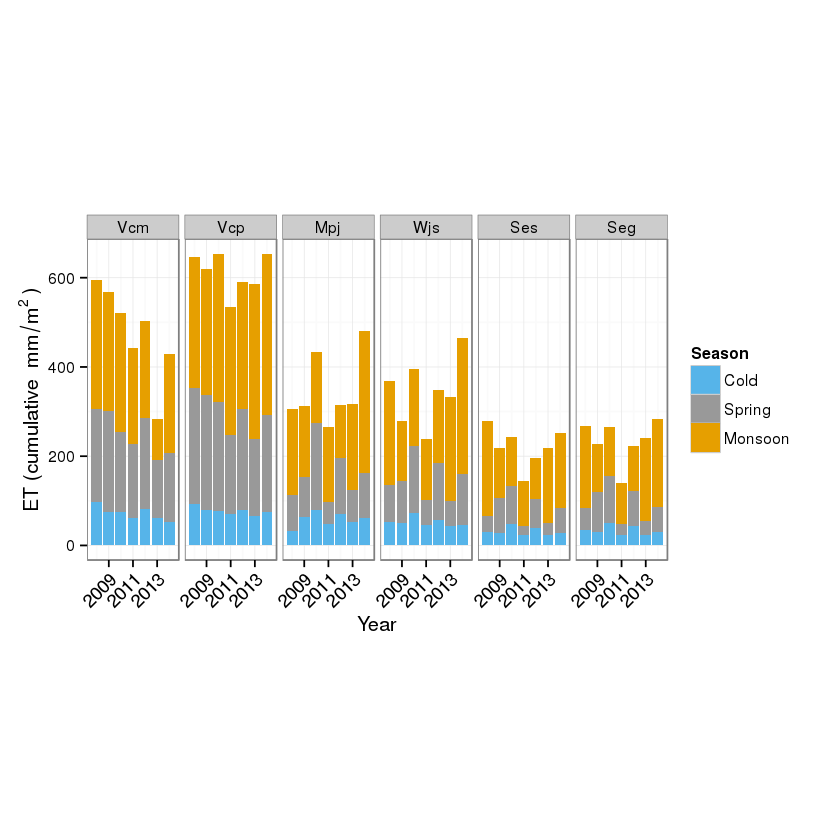

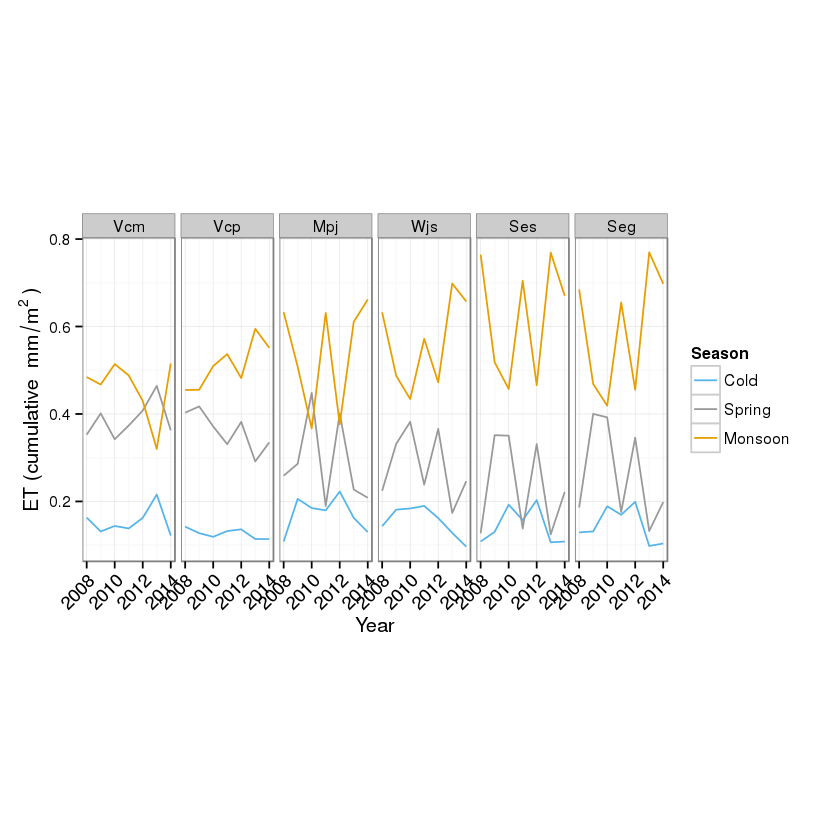

In [14]:
ET.m <- melt(ET_daily, id.vars=c('season', 'year_w'))
ET.m <- ddply(ET.m, .(variable, season, year_w), summarise, seas_sum = sum(value, na.rm = T))

ET_seas_by_yr <- ggplot(ET.m, aes(x=year_w, y=seas_sum, fill=factor(season))) +
  geom_bar(stat='identity') + facet_wrap(~variable, nrow=1) + 
  xlab('Year') + ylab(bquote('ET (cumulative '~ mm/m^2 ~')')) +
  theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
  scale_fill_manual(values=c("#56B4E9", "#999999", "#E69F00"), name="Season") +
    theme(aspect.ratio=3.5)

ET_seas_by_yr

# Calculate seasonal ET as a percentage for the year
ET.pct <- ddply(ET.m, .(variable, year_w), summarise, season=season, pct = seas_sum/sum(seas_sum, na.rm = T))
print(ET.pct[1:10,])

ET_seas_pct_year <- ggplot(ET.pct, aes(x=year_w, y=pct, color=factor(season))) +
    geom_line(stat='identity') + facet_wrap(~variable, nrow=1) + 
    xlab('Year') + ylab(bquote('ET (cumulative '~ mm/m^2 ~')')) +
    theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
    scale_color_manual(values=c("#56B4E9", "#999999", "#E69F00"), name="Season") +
    theme(aspect.ratio=3.5)

ET_seas_pct_year

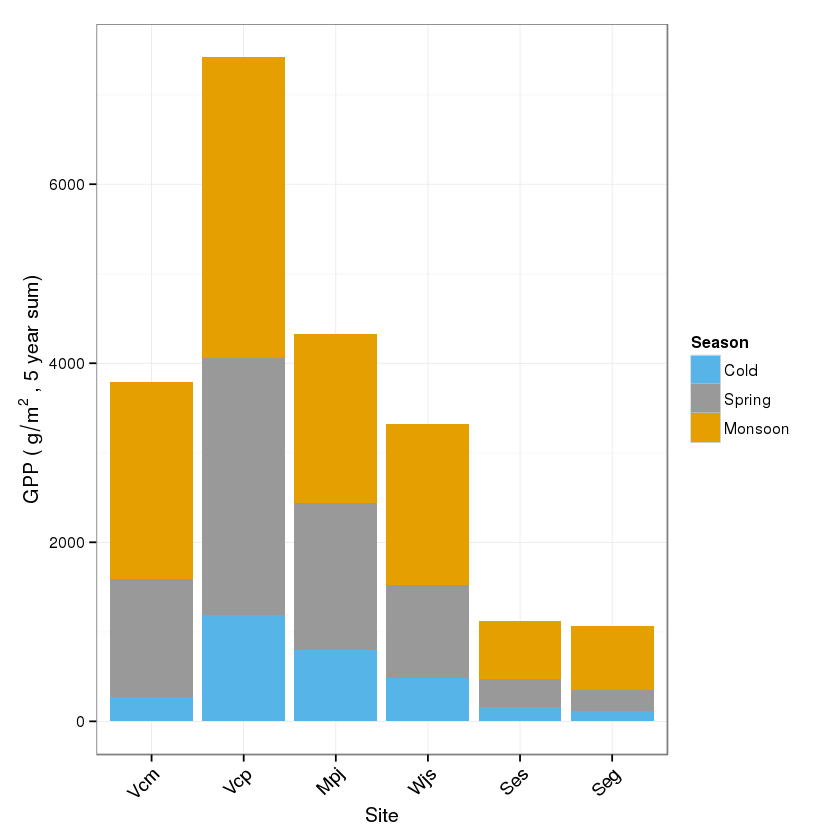

In [15]:
# Look at 5 year cumulative GPP, divided into the 3 seasons
GPP.m <- melt(GPP_daily, id.vars='season')
GPP.m <- subset(GPP.m, subset=(variable != 'year_w'))
GPP.m <- ddply(GPP.m, .(variable, season), summarise, sum = sum(value, na.rm = T))

GPP_seas_multiyr <- ggplot(GPP.m, aes(x=variable, y=sum, fill=factor(season))) +
  geom_bar(stat='identity') + xlab('Site') + 
  ylab(bquote('GPP ('~ g/m^2 ~', 5 year sum)')) +
  theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
  scale_fill_manual(values=c("#56B4E9", "#999999", "#E69F00"), 
                    name="Season")
GPP_seas_multiyr

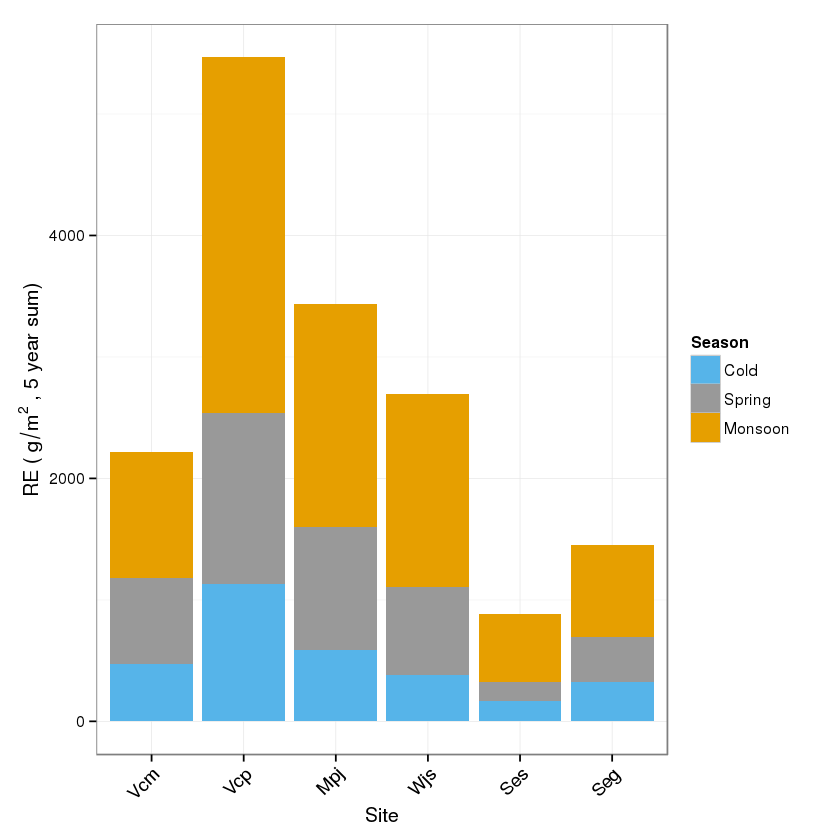

In [16]:
# Look at cumulative RE over a 5 year period, divided into the 3 seasons
RE.m <- melt(RE_daily, id.vars='season')
RE.m <- subset(RE.m, subset=(variable != 'year_w'))
RE.m <- ddply(RE.m, .(variable, season), summarise, sum = sum(value, na.rm = T))

RE_seas_multiyr <- ggplot(RE.m, aes(x=variable, y=sum, fill=factor(season))) +
  geom_bar(stat='identity') + xlab('Site') + 
  ylab(bquote('RE ('~ g/m^2 ~', 5 year sum)')) +
  theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
  scale_fill_manual(values=c("#56B4E9", "#999999", "#E69F00"), 
                    name="Season")
RE_seas_multiyr

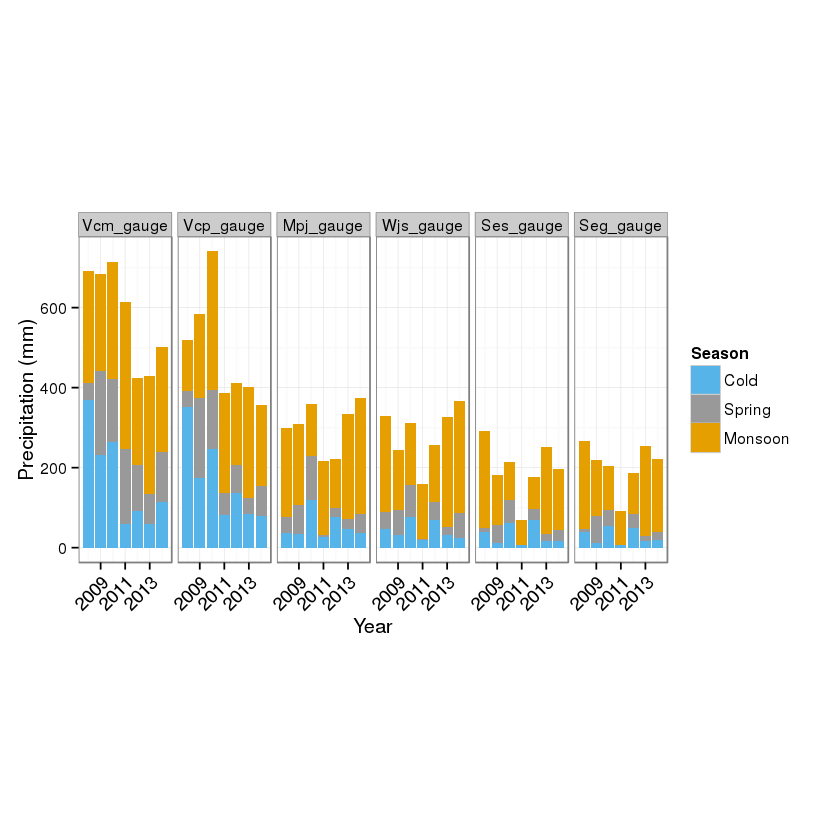

In [74]:
# Look at cumulative gauge Precip over a 6 year period, divided into the 3 seasons
gaugeP.m <- melt(P_gauge_daily, id.vars=c('season', 'year_w'))
#print(P.m)
gaugeP.m <- ddply(gaugeP.m, .(variable, season, year_w), summarise, sum = sum(value, na.rm = TRUE))

P_seas_by_yr <- ggplot(gaugeP.m, aes(x=year_w, y=sum, fill=factor(season))) +
  geom_bar(stat='identity') + facet_wrap(~ variable, nrow=1) +
  xlab('Year') + ylab('Precipitation (mm)') + 
  theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
  scale_fill_manual(values=c("#56B4E9", "#999999", "#E69F00"), name="Season") +
  theme(aspect.ratio=3.5)
P_seas_by_yr

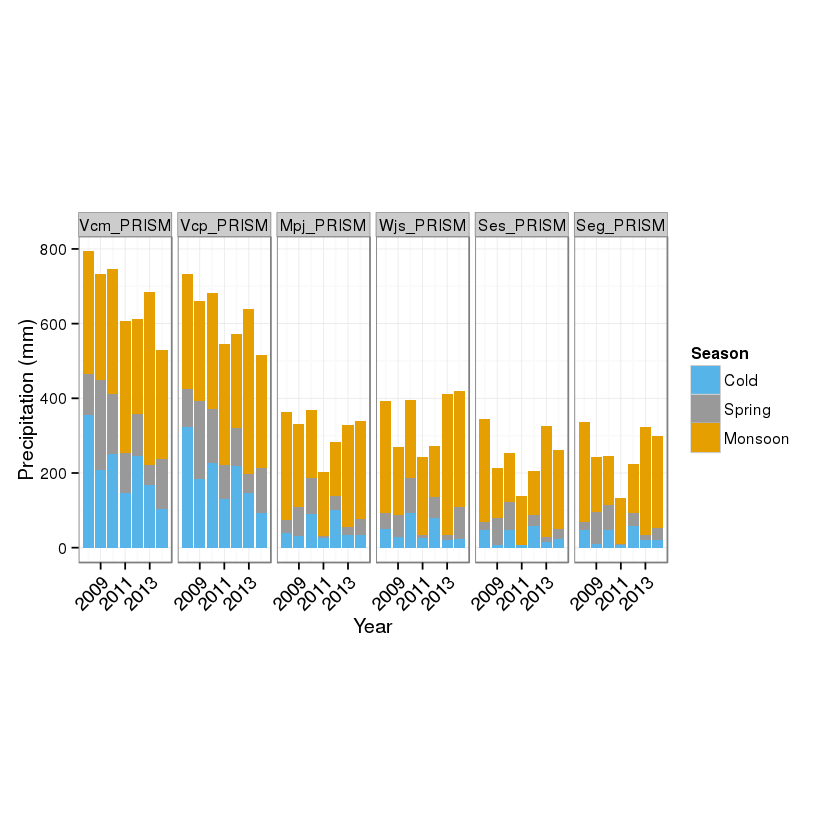

In [84]:
# Look at cumulative PRISM Precip over a 6 year period, divided into the 3 seasons
prismP.m <- melt(P_PRISM_daily, id.vars=c('season', 'year_w'))
prismP.m <- ddply(prismP.m, .(variable, season, year_w), summarise, sum = sum(value, na.rm = T))

P_seas_by_yr <- ggplot(prismP.m, aes(x=year_w, y=sum, fill=factor(season))) +
  geom_bar(stat='identity') + facet_wrap(~ variable, nrow=1) +
  xlab('Year') + ylab('Precipitation (mm)') + 
  theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
  scale_fill_manual(values=c("#56B4E9", "#999999", "#E69F00"), name="Season") +
  theme(aspect.ratio=3.5)
P_seas_by_yr

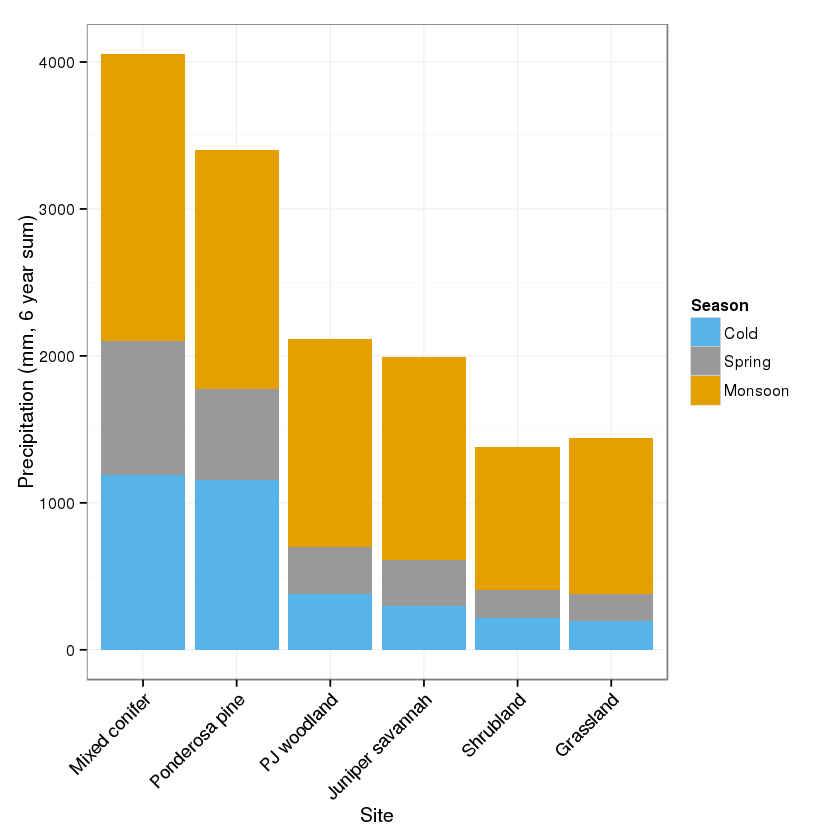

In [45]:
P.m <- melt(P_gauge_daily, id.vars='season')
P.m <- subset(P.m, subset=(variable != 'year_w'))
P.m <- ddply(P.m, .(variable, season), summarise, sum = sum(value, na.rm = T))

P_seas_multiyr <- ggplot(P.m, aes(x=variable, y=sum, fill=factor(season))) +
  geom_bar(stat='identity') + xlab('Site') + ylab('Precipitation (mm, 6 year sum)') +
  theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
  scale_fill_manual(values=c("#56B4E9", "#999999", "#E69F00"), 
                    name="Season")
P_seas_multiyr

In [44]:
printfigs(P_seas_multiyr, 'P_seas_multiyr.svg', 7, 6)
printfigs(GPP_seas_by_yr, 'GPP_seas_by_yr.svg', 12, 3)
printfigs(RE_seas_by_yr, 'RE_seas_by_yr.svg', 12, 3)
printfigs(NEE_seas_by_yr, 'NEE_seas_by_yr.svg', 12, 3)
printfigs(P_seas_by_yr, 'P_seas_by_yr.svg', 12, 3)

ERROR: Error in grid.newpage(): cairo error 'error while writing to output stream'


ERROR: Error in printfigs(GPP_seas_by_yr, "GPP_seas_by_yr.svg", 12, 3): object 'GPP_seas_by_yr' not found


ERROR: Error in grid.newpage(): cairo error 'error while writing to output stream'


ERROR: Error in grid.newpage(): cairo error 'error while writing to output stream'


ERROR: Error in grid.newpage(): cairo error 'error while writing to output stream'


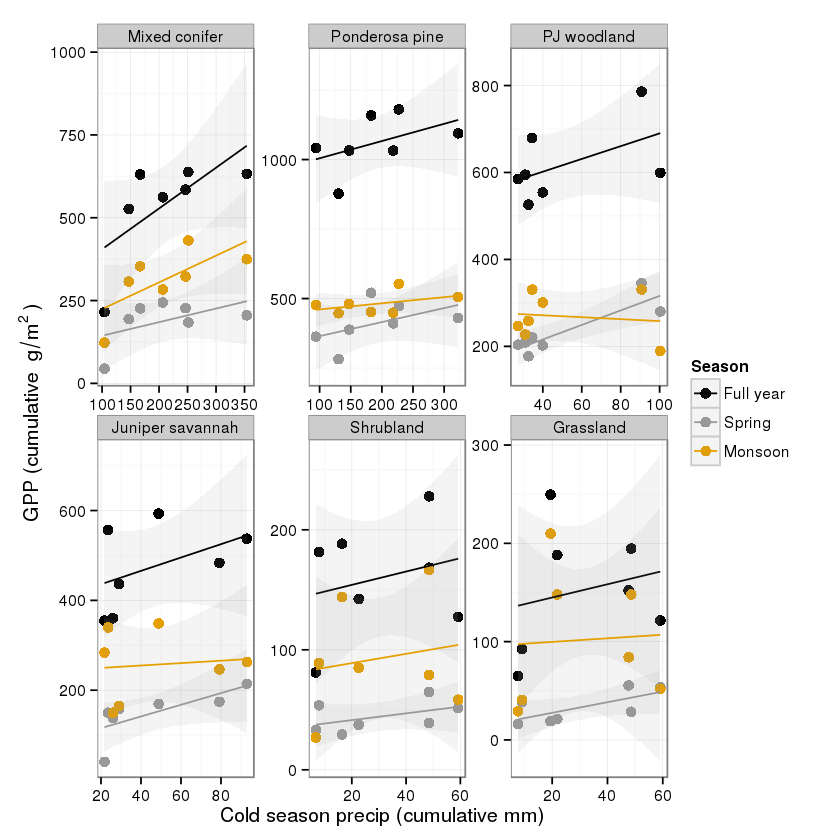

In [46]:
# Get seasonal FC totals for each season at all sites and yearly total
get_precip_flux_dep <- function(df_daily){
  flux.m <- melt(df_daily, id.vars=c('season', 'year_w'))
  flux_tot <- ddply(flux.m, .(variable, year_w),
                    summarise, year_flux_tot = sum(value, na.rm = T))
  flux_wyr_seas.m <- ddply(flux.m, .(variable, season, year_w),
                           summarise, year_seas_tot = sum(value, na.rm = T))
  
  # subset spring flux
  flux_spring <- subset(flux_wyr_seas.m, subset=(season=='Spring'))
  flux_spring <- rename(flux_spring, c("year_seas_tot"="Spring_flux_tot"))
  flux_spring$season <- NULL
  
  # subset monsoon flux
  flux_monsoon <- subset(flux_wyr_seas.m, subset=(season=='Monsoon'))
  flux_monsoon <- rename(flux_monsoon, c("year_seas_tot"="Monsoon_flux_tot"))
  flux_monsoon$season <- NULL
  
  # Get seasonal Precip totals for each season at all sites
  P.m <- melt(P_PRISM_daily, id.vars=c('season', 'year_w'))
  P_wyr_seas.m <- ddply(P.m, .(variable, season, year_w),
                        summarise, P_tot = sum(value, na.rm = T))
  
  # Merge in flux_spring, flux_monsoon, and flux_tot by site/year
  P_dep <- P_wyr_seas.m
  P_dep <- merge(P_dep, flux_tot, by=c('variable', 'year_w'))
  P_dep <- merge(P_dep, flux_spring, by=c('variable', 'year_w'))
  P_dep <- merge(P_dep, flux_monsoon, by=c('variable', 'year_w'))
  
  return(P_dep)
}

NEE_P_dep <- get_precip_flux_dep(FC_daily)
GPP_P_dep <- get_precip_flux_dep(GPP_daily)
#  Yearly, Spring, and Monsoon fluxes vs cold season precip
subs <- subset(GPP_P_dep, subset=(season=='Cold'))
names(subs)[1]<-"Site"
subs = melt(subs, measure.vars=c("year_flux_tot", "Spring_flux_tot", "Monsoon_flux_tot"))
GPP_on_coldP <- ggplot(subs, aes(x=P_tot, y=value, col=variable)) +
  geom_point(size=3) + stat_smooth(method=lm, alpha = 0.1) +
  facet_wrap(~ Site, scales = 'free') + xlab('Cold season precip (cumulative mm)') + 
  ylab(bquote('GPP (cumulative '~ g/m^2 ~')')) +
  scale_colour_manual(values=c("black", "#999999", "#E69F00"),
                      labels=c("Full year", "Spring", "Monsoon"),
                      name="Season")
GPP_on_coldP

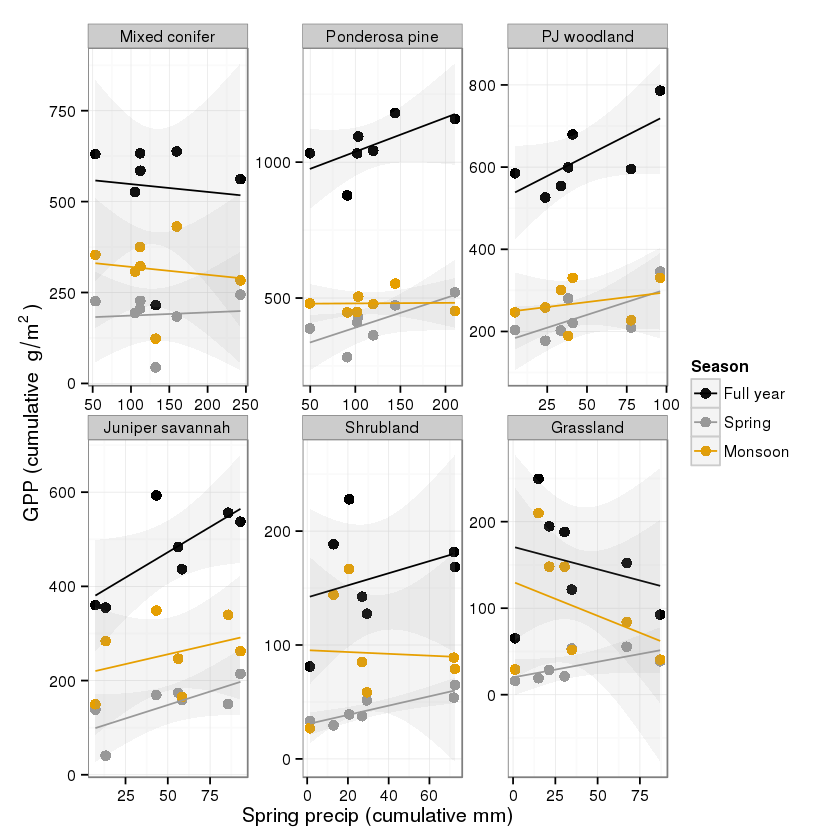

In [47]:
#  Yearly, Spring, and Monsoon fluxes vs spring season precip
subs <- subset(GPP_P_dep, subset=(season=='Spring'))
names(subs)[1]<-"Site"
subs = melt(subs, measure.vars=c("year_flux_tot", "Spring_flux_tot", "Monsoon_flux_tot"))
GPP_on_springP <- ggplot(subs, aes(x=P_tot, y=value, col=variable)) +
  geom_point(size=3) + stat_smooth(method=lm, alpha = 0.1) +
  facet_wrap(~ Site, scales = 'free') + xlab('Spring precip (cumulative mm)') + 
  ylab(bquote('GPP (cumulative '~ g/m^2 ~')')) +
  scale_colour_manual(values=c("black", "#999999", "#E69F00"),
                      labels=c("Full year", "Spring", "Monsoon"),
                      name="Season")
GPP_on_springP

ERROR: Error in grid.newpage(): cairo error 'error while writing to output stream'


ERROR: Error in grid.newpage(): cairo error 'error while writing to output stream'


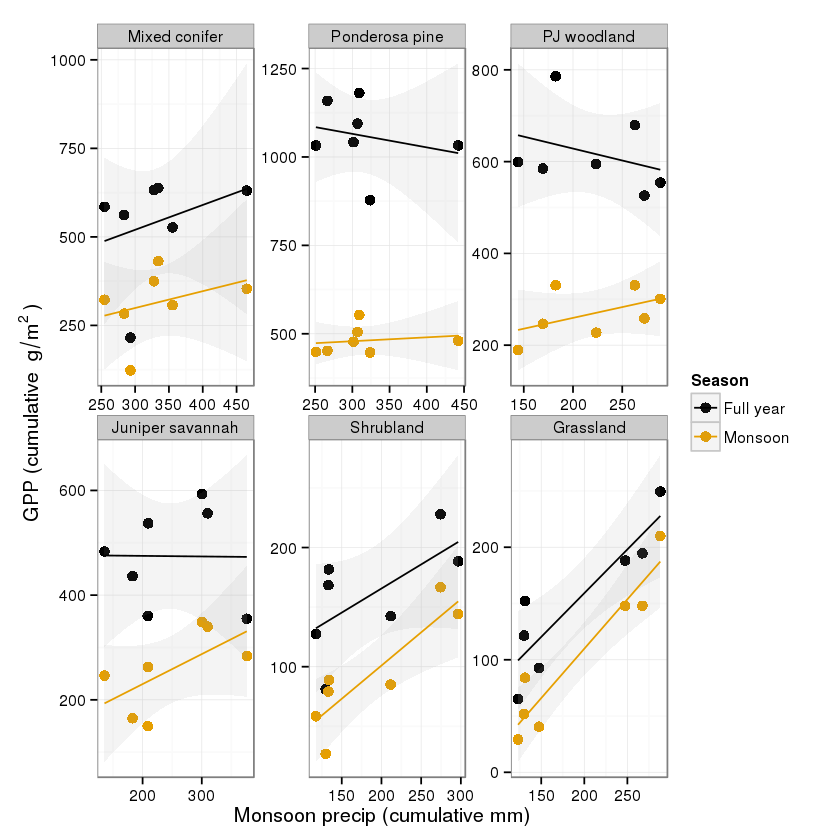

In [48]:
#  Yearly, Spring, and Monsoon fluxes vs monsoon season precip
subs <- subset(GPP_P_dep, subset=(season=='Monsoon'))
names(subs)[1]<-"Site"
subs = melt(subs, measure.vars=c("year_flux_tot", "Monsoon_flux_tot"))
GPP_on_monsoonP <- ggplot(subs, aes(x=P_tot, y=value, col=variable)) +
  geom_point(size=3) + stat_smooth(method=lm, alpha = 0.1) +
  facet_wrap(~ Site, scales = 'free') + xlab('Monsoon precip (cumulative mm)') + 
  ylab(bquote('GPP (cumulative '~ g/m^2 ~')')) +
  scale_colour_manual(values=c("black", "#E69F00"),
                      labels=c("Full year", "Monsoon"),
                      name="Season")

GPP_on_monsoonP
printfigs(GPP_on_monsoonP, 'GPP_on_monsoonP.svg', 8.5, 5)
printfigs(GPP_on_coldP, 'GPP_on_coldP.svg', 8.5, 5)

Warning message:
: Removed 270 rows containing missing values (geom_path).

ERROR: Error in grid.newpage(): cairo error 'error while writing to output stream'


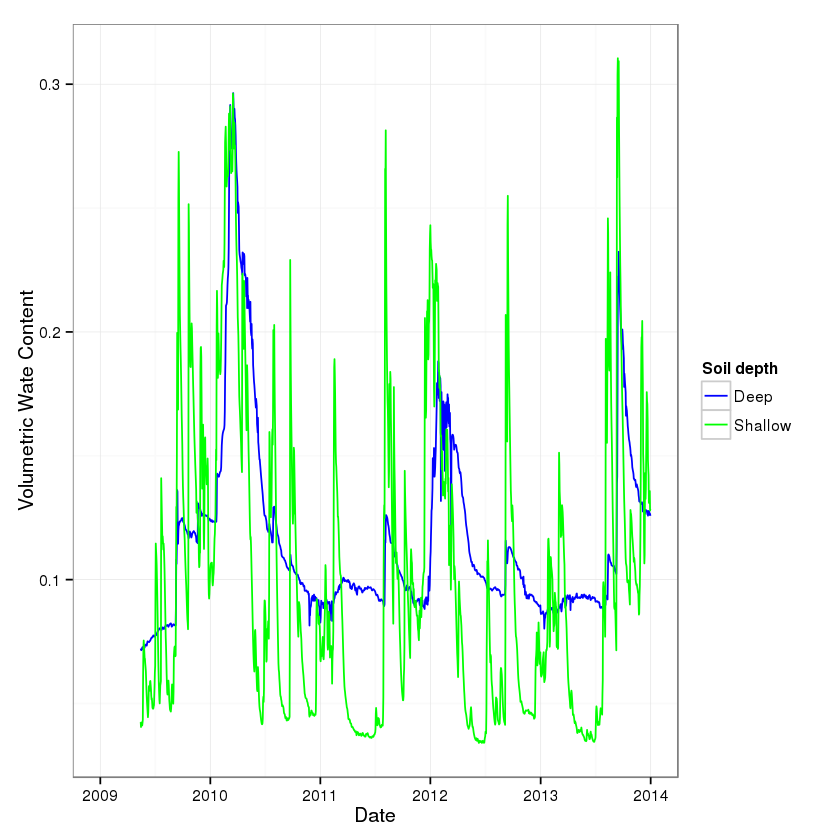

In [49]:
# On to soil water content
deep <- grep('30_AVG', colnames(VWC_daily), value=T)
shallow <- grep('5_AVG', colnames(VWC_daily), value=T)

VWC_daily['Deep'] <- rowMeans(VWC_daily[deep], na.rm=T)
VWC_daily['Shallow'] <- rowMeans(VWC_daily[shallow], na.rm=T)


# Make a smaller dataset to melt
VWC <- VWC_daily[,c('year_month_mday','year_w','doy_w','season','Deep','Shallow')]
VWC.m <- melt(VWC, id.vars=c('year_month_mday', 'year_w', 'doy_w', 'season'))

VWC_ts <- ggplot(VWC.m, aes(x=as.Date(year_month_mday), y=value, color=variable)) +
  geom_line() + scale_color_manual(name="Soil depth",values=c("blue", "green")) +
  ylab('Volumetric Wate Content') + xlab('Date')

VWC_ts
printfigs(VWC_ts, 'VWC_ts.svg', 10, 2)

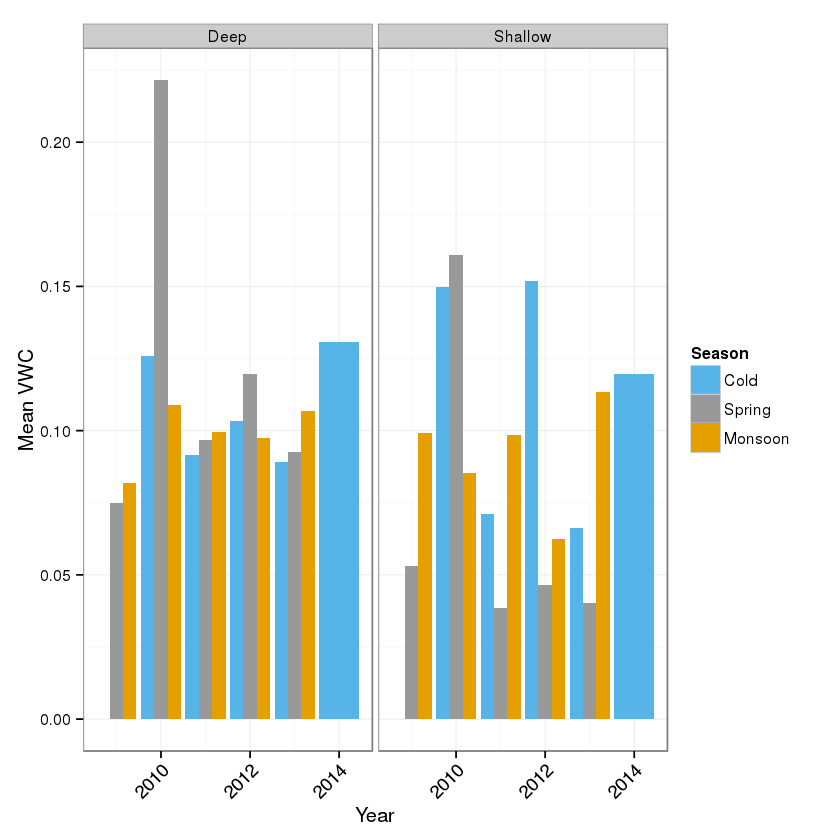

In [50]:
VWC.m <- ddply(VWC.m, .(variable, season, year_w),
               summarise, VWC_med = median(value, na.rm = T))

VWC_seas_by_yr <- ggplot(VWC.m, aes(x=year_w, y=VWC_med, fill=factor(season))) +
  geom_bar(stat='identity', position='dodge') + facet_wrap(~ variable, nrow=1) +
  xlab('Year') + ylab('Mean VWC') + 
  theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
  scale_fill_manual(values=c("#56B4E9", "#999999", "#E69F00"), 
                    name="Season")
VWC_seas_by_yr
#printfigs(VWC_seas_by_yr, 'VWC_seas_by_yr.svg', 6.5, 4)

Warning message:
: Removed 1 rows containing missing values (stat_smooth).Warning message:
: Removed 1 rows containing missing values (stat_smooth).Warning message:
: Removed 1 rows containing missing values (geom_point).Warning message:
: Removed 1 rows containing missing values (geom_point).

ERROR: Error in grid.newpage(): cairo error 'error while writing to output stream'


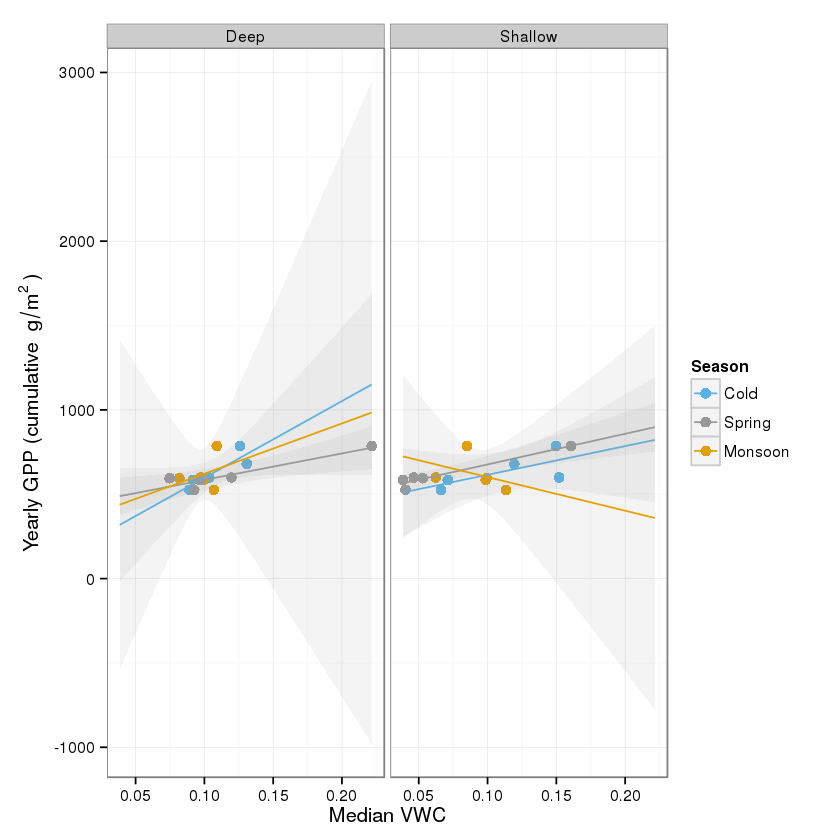

In [37]:
GPP_sub <- subset(GPP_P_dep, subset=(year_w > 2008 & variable=='PJ woodland'))
VWC.m <- merge(VWC.m, GPP_sub, by=c('season', 'year_w'))

GPP_vs_VWC <- ggplot(VWC.m, aes(x=VWC_med, y=year_flux_tot, col=factor(season))) +
  geom_point(size=3) + stat_smooth(method=lm, alpha=0.1, fullrange=T) +
  facet_wrap(~variable.x, nrow=1) + xlab('Median VWC') + 
  ylab(bquote('Yearly GPP (cumulative '~ g/m^2 ~')')) +
  scale_colour_manual(values=c("#56B4E9", "#999999", "#E69F00"), 
                      name="Season")
GPP_vs_VWC
printfigs(GPP_vs_VWC, 'GPP_vs_VWC.svg', 6.5, 4)

In [61]:
# #  Yearly GPP vs total precip in each of 3 seasons
# ggplot(GPP_P_dep, aes(x=P_tot, y=year_flux_tot, col=factor(season))) +
#   geom_point() + facet_wrap(~ variable)
# 
# #  Spring NEE vs total precip in each of 3 seasons
# ggplot(NEE_P_dep, aes(x=P_tot, y=Spring_flux_tot, col=factor(season))) +
#   geom_point() + facet_wrap(~ variable)
# #  Spring GPP vs total precip in each of 3 seasons
# ggplot(GPP_P_dep, aes(x=P_tot, y=Spring_flux_tot, col=factor(season))) +
#   geom_point() + facet_wrap(~ variable)
# 
# #  Monsoon NEE vs total precip in each of 3 seasons
# ggplot(NEE_P_dep, aes(x=P_tot, y=Monsoon_flux_tot, col=factor(season))) +
#   geom_point() + facet_wrap(~ variable)
# #  Monsoon GPP vs total precip in each of 3 seasons
# ggplot(GPP_P_dep, aes(x=P_tot, y=Monsoon_flux_tot, col=factor(season))) +
#   geom_point() + facet_wrap(~ variable)
# 
# + xlab('Site') + ylab('Precipitation (mm, 6 year sum)') +
#   theme(axis.text.x=element_text(angle=45, hjust=1, size=11)) + 
#   scale_fill_manual(values=c("#56B4E9", "#999999", "#E69F00"), 
#                     name="Season")